# Thu thập, xử lý và dự đoán giá cho thuê phòng airbnb

AIRBNB là cụm từ viết tắt từ Airbed and Breakfast (nhằm
chỉ việc ngoài có chỗ ngả lưng và còn được phục vụ bữa
sáng miễn phí). Đây là một dịch vụ di động nhằm kết nối
người cần thuê nhà, chỗ ở với những người có nhu cầu cho
thuê nhà và chỗ ở.

![](https://static.giga.de/wp-content/uploads/2016/05/Airbnb-Login-Artikelbild.jpg)


# 1. Crawl data
* Clone code crawl data từ link github[Airbnb-crawl-data](https://github.com/hanahhh/crawl-airbnb-data)
* Cài đặt theo các bước hướng dẫn trong phần ReadMe
* Các cách crawl data
  * Crawl một tỉnh với giá cụ thể `scrapy crawl airbnb -a city='{cityname}' -a price_lb='{pricelowerbound}' -a price_ub='{priceupperbound}'`. Trong đó, `city` chỉ tỉnh thành, `privelowerbound` chỉ giá dưới, `priceupperbound` chỉ giá trên.
  * Crawl toàn bộ các tỉnh của Việt Nam theo giá tăng dần `python -m crawl.script --step {step} --max_price {max_price}`.

# 2. Data visualization

##2.1. Chuẩn bị dữ liệu

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Vietnam_provinces.geojson to Vietnam_provinces (1).geojson


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving outputfinaldata.csv to outputfinaldata.csv


In [ ]:
!pip install geopandas bokeh

In [ ]:
! pip install wordcloud

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.models.annotations import Title

In [ ]:
df1 = pd.read_csv('/content/data.csv')

In [ ]:
df4 = pd.read_csv('/content/finaldata.csv')

In [ ]:
df2 = pd.read_csv('/content/outputfinaldata.csv')

<ipython-input-151-e3f447f75e57>:1: DtypeWarning: Columns (3,4,5,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,65,66,70,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/outputfinaldata.csv')


In [ ]:
df = pd.read_csv('/content/output3.csv')
df = df.drop('Unnamed: 0.1', axis=1)

<ipython-input-60-2ebff100f0f2>:1: DtypeWarning: Columns (12,13,14,17,37,71,72,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/output3.csv')


In [ ]:
df.head()

,room_id,url,rating,city,contextualPicturesCount,lat,long,listingObjType,pdpUrlType,name,...,SYSTEM_BREAKFAST,SYSTEM_GYM,SYSTEM_BABY_BATH,SYSTEM_CABLE,SYSTEM_PACK_N_PLAY,SYSTEM_MAPS_BAR,SYSTEM_DESERT_CACTUS,SYSTEM_VIDEO_GAME,SYSTEM_SPEAKERS,SYSTEM_RECORD_PLAYER
0,662658188204597853,https://www.airbnb.com.vn/rooms/66265818820459...,"4,74",vungtau,12,10.351216,107.099340,REGULAR,NaN,Entire Service Apartment Studio w/Sea View - 2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,923119246555865639,https://www.airbnb.com.vn/rooms/92311924655586...,"5,0",vungtau,20,10.350182,107.098016,REGULAR,NaN,LEO Healing House - The Sóng Apartment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,791715672021908599,https://www.airbnb.com.vn/rooms/79171567202190...,"4,95",vungtau,28,10.351750,107.098650,REGULAR,NaN,"MESSI Home - căn hộ 2ph đi bộ đến biển, view biển",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,700236784571541824,https://www.airbnb.com.vn/rooms/70023678457154...,"4,88",vungtau,30,10.350043,107.095824,REGULAR,NaN,JENBU Suite 5* The Song @luxury@reasonable price,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,562709964133192609,https://www.airbnb.com.vn/rooms/56270996413319...,"4,84",vungtau,8,10.354328,107.088593,REGULAR,NaN,"Lily's House - Blue Sea, 01 BR, private bathroom",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20361 entries, 0 to 20360
Data columns (total 74 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   room_id                     20361 non-null  int64  
 1   url                         20361 non-null  object 
 2   rating                      9502 non-null   object 
 3   city                        20361 non-null  object 
 4   contextualPicturesCount     20361 non-null  int64  
 5   lat                         20361 non-null  float64
 6   long                        20361 non-null  float64
 7   listingObjType              20361 non-null  object 
 8   pdpUrlType                  0 non-null      float64
 9   name                        20359 non-null  object 
 10  roomTypeCategory            20361 non-null  object 
 11  reviewCount                 10059 non-null  object 
 12  canInstantBook              20333 non-null  object 
 13  weeklyPriceFactor           12 

##2.2. Data visualization

### Biểu đồ nhiệt thể hiện mối quan hệ giữa các thuộc tính quan trọng

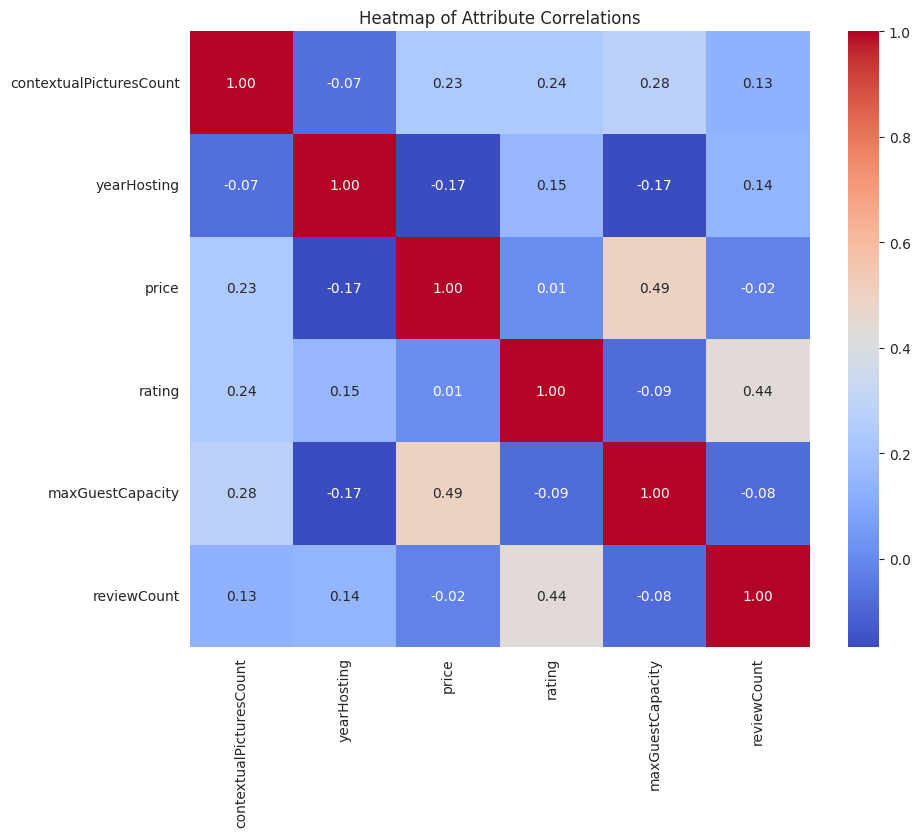

In [ ]:
num_feat=df1[['contextualPicturesCount', 'yearHosting', 'price', 'rating', 'maxGuestCapacity', 'reviewCount']]
num_feat
correlation_matrix = num_feat.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Attribute Correlations")
plt.show()

### Bản đồ số lượng phòng cho thuê tại các tỉnh thành tại Việt Nam

#### Code

In [ ]:
covid19_vn = pd.read_csv('/content/output3.csv')
covid19_vn["plot_data"] = covid19_vn['price']
gdf_vn = gpd.read_file('/content/Vietnam_provinces.geojson')

import re
def transform_location(location):
    # Biểu thức chính quy để tìm từ cuối cùng
    last_word_regex = r'\b\w+\s*$'

    # Sử dụng hàm re.sub để thay thế từ cuối cùng bằng chuỗi rỗng (loại bỏ)
    transformed_location = re.sub(last_word_regex, '', location).lower().replace(' ', '')

    return transformed_location
gdf_vn['city'] = gdf_vn['Name'].apply(transform_location)

av_price = covid19_vn['city'].value_counts()
df_count_by_city = av_price.reset_index()
df_count_by_city.columns = ['city', 'num_record']

vn_data = gdf_vn.merge(df_count_by_city[['city', 'num_record']], on='city', how='left')
vn_data.to_csv("/content/data.csv")
df_count_by_city.head(10)

<ipython-input-133-842c07174634>:1: DtypeWarning: Columns (12,13,14,17,37,71,72,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  covid19_vn = pd.read_csv('/content/output3.csv')


,city,num_record
0,hanoi,1928
1,hochiminh,1898
2,danang,1758
3,khanhhoa,1248
4,quangnam,1193
5,kiengiang,1072
6,haiphong,836
7,quangninh,753
8,hue,730
9,lamdong,674


In [ ]:
plot_data = json.dumps(json.loads(vn_data.to_json()))
geosource = GeoJSONDataSource(geojson=plot_data)
palette = brewer['RdYlGn'][8]
color_mapper = LinearColorMapper(palette=palette, low=0, high=np.ceil(covid19_vn.price.max()))
tick_labels = {
    '0': '0', '0.5': '', '1': '2', '1.5': '',
    '2':'5', '2.5': '12', '3':'20', '4':'50',
    '5':'150', '6':'400','7':'1000', '8': '3000'
}
color_bar = ColorBar(
    color_mapper=color_mapper,
    label_standoff=8,
    width=850,
    height = 20,
    border_line_color=None,
    location = (0,0),
    orientation = 'horizontal',
    major_label_overrides = tick_labels
)

datestr = datetime.datetime.now().strftime("ngày %d tháng %m năm %Y")
title = Title()
# Tùy theo giá trị muốn vẽ mà thay đổi tiêu đề cho phù hợp
title.text = f"Airbnb Việt Nam, số lượng phòng cho thuê"
title.text_font_size = '16pt'
title.align = "center"

p = figure(
    title=title,
    title_location='above',
    outer_height=1000 ,
    outer_width=900,
    toolbar_location=None
)

# tinh chỉnh một số thuộc tính của hai trục
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.xaxis.axis_label = 'Kinh độ (longitude)'
p.xaxis.axis_label_text_font_size = "14pt"
p.yaxis.axis_label = 'Vĩ độ (latitude)'
p.yaxis.axis_label_text_font_size = "14pt"
p.yaxis.major_label_text_font_size = "12pt"
p.xaxis.major_label_text_font_size = "12pt"

p.patches(
    xs='xs',
    ys='ys',
    source=geosource,
    fill_color = {'field' :'num_record', 'transform' : color_mapper}, # plot_data là field dùng để  quy định độ đậm nhạt màu tô
    line_color = 'black',
    line_width = 0.25,
    fill_alpha = 1
)

p.add_layout(color_bar, 'above')
output_notebook()

#### Map

In [ ]:
show(p)

Các tỉnh thành lớn như Hà Nội, Thành phố Hồ Chí Minh, Đà Nẵng, Khánh Hòa, ... ghi nhận có số phòng lớn nhất

###Giá thuê phòng trung bình theo từng tỉnh thành

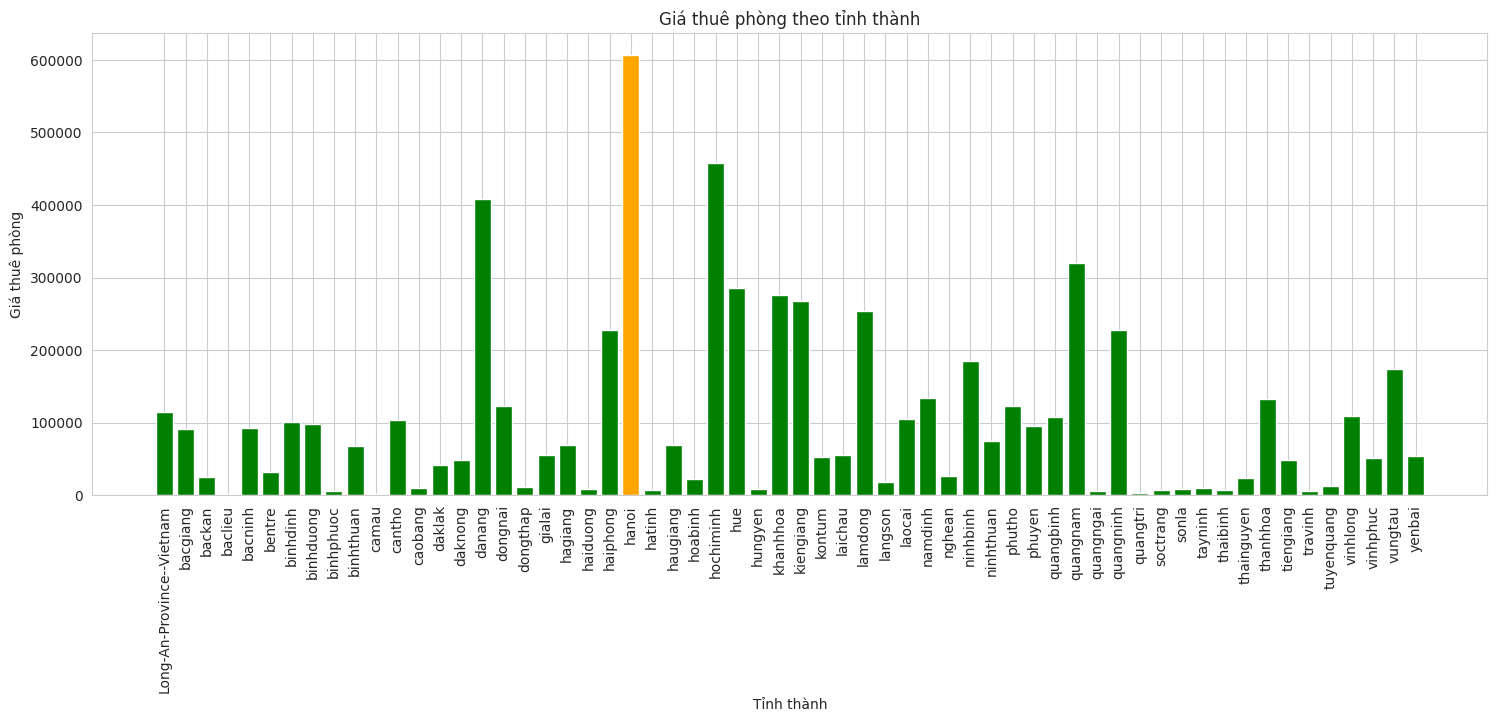

In [ ]:
data = df.groupby('city')['price'].mean()
maxpopulation = data.idxmax()
colors = ['orange' if i == maxpopulation else 'green' for i in data.index]
plt.figure(figsize=(18, 6))
plt.bar(data.index, data.values, color=colors)
plt.xlabel('Tỉnh thành')
plt.ylabel('Giá thuê phòng')
plt.title('Giá thuê phòng theo tỉnh thành')
plt.xticks(rotation=90)
plt.show()

Tiếp tục, các tỉnh thành lớn như Hà Nội, Thành phố Hồ Chí Minh, Đà Nẵng, Khánh Hòa, ... ghi nhận giá phòng cao hơn so với các tỉnh khác

In [ ]:
df['maxGuestCapacity']

0         4.0
1         4.0
2         6.0
3         4.0
4         2.0
         ... 
20356     2.0
20357     2.0
20358    12.0
20359     2.0
20360     4.0
Name: maxGuestCapacity, Length: 20361, dtype: object

### Số lượng bản ghi phân bố theo loại phòng

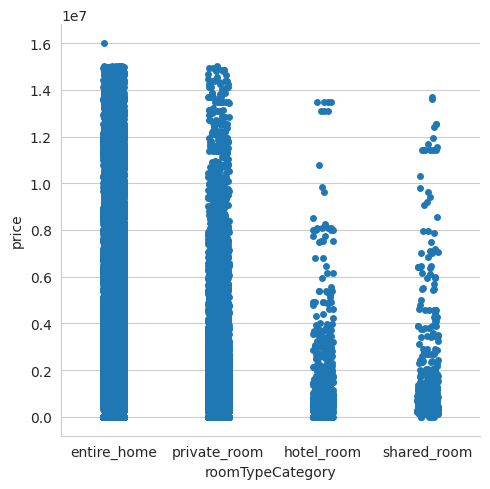

In [ ]:
# value_counts = df['roomTypeCategory'].value_counts()

# # Vẽ biểu đồ tròn
# plt.figure(figsize=(8, 8))
# plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
# plt.axis('equal')
# plt.title('Pie Chart of Column')
# plt.show()

sns.catplot(x="roomTypeCategory", y="price", data=df2);

Dữ liệu khá lệch, chủ yếu là 2 nhãn entire_home và private home. Nguyên nhân là do airbnb là nền tảng cho thuê homestay nên khách sạn và những phòng thuê chung có số lượng ít hơn.

### Word cloud cho tên phòng

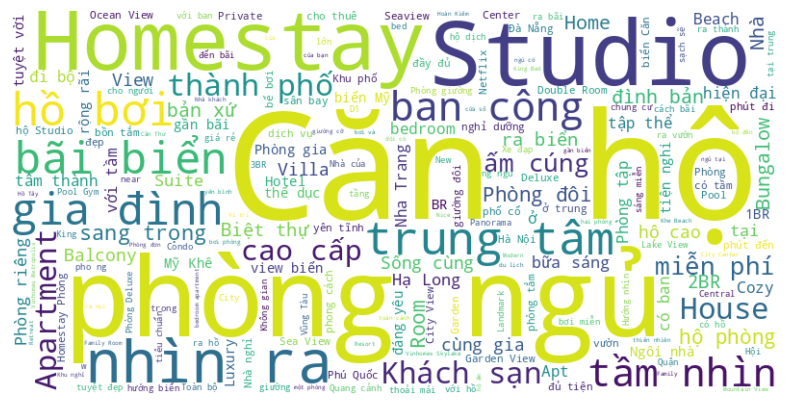

In [ ]:
df['name'] = df['name'].astype(str)
text = " ".join(df['name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Hiển thị WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Box plot cho từng loại phòng theo giá

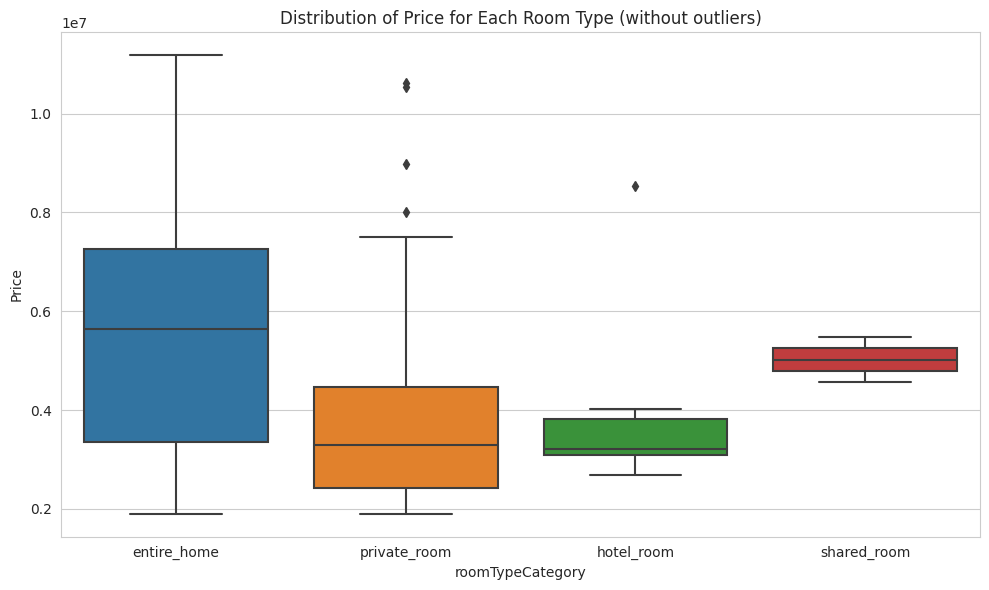

In [ ]:
# Extract the 'roomType' and 'price' columns from the DataFrame
df5 = df1
room_types = df5['roomTypeCategory']
prices = df5['price']

# Create a new DataFrame combining roomType and price columns
data = pd.DataFrame({'roomTypeCategory': room_types, 'price': prices})

# Calculate the z-scores for the 'price' column
z_scores = np.abs((data['price'] - data['price'].mean()) / data['price'].std())

# Define a threshold for the z-scores to identify outliers
threshold = 1.25

# Remove outliers by filtering the data
data = data[z_scores <= threshold]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as desired

# Draw the strip plot without outliers
sns.boxplot(data=data, x='roomTypeCategory', y='price', ax=ax)

# Set the y-axis label
ax.set_ylabel('Price')

# Set the title
ax.set_title('Distribution of Price for Each Room Type (without outliers)')

# Display the plot
plt.tight_layout()
plt.show()

### Biểu đồ phân bố phân khúc giá theo từng loại phòng

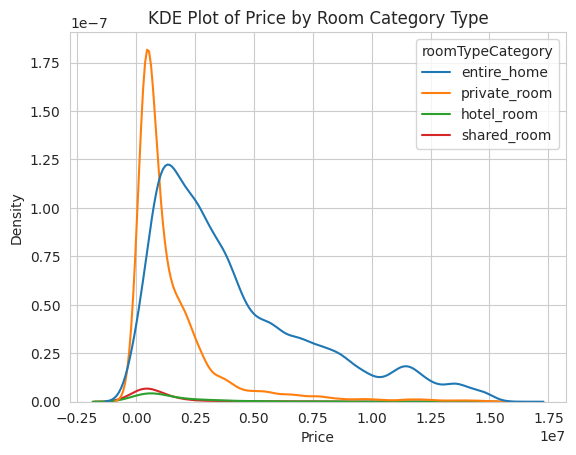

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Set the plot style
sns.set_style("whitegrid")

# Create the KDE plot
sns.kdeplot(data=df2, x="price", hue="roomTypeCategory")

# Set labels and title
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("KDE Plot of Price by Room Category Type")

# Display the plot
plt.show()

### Biểu đồ phân bố rating

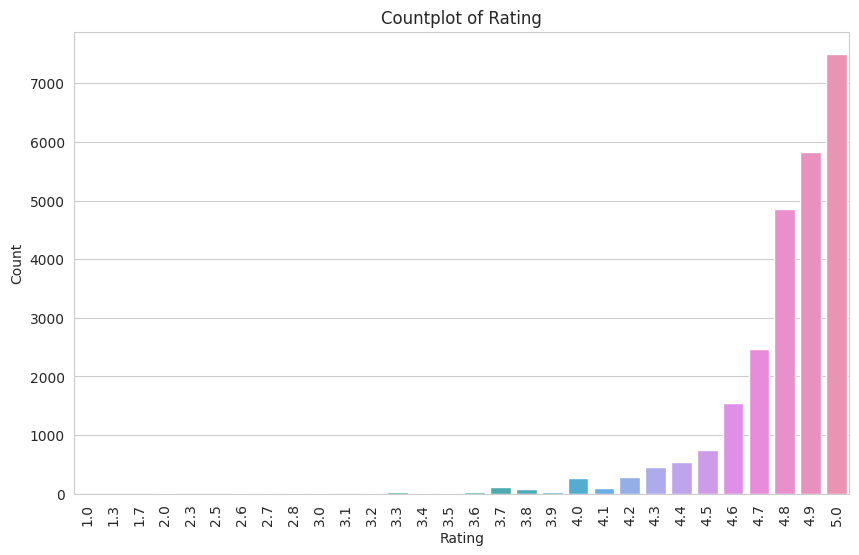

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'airbnb_data' is your DataFrame
df2['rating'] = pd.to_numeric(df2['rating'].replace(',', '.', regex=True))
# Round the numeric columns to 1 decimal place
df2['rating'] = df2['rating'].round(1)



# Assuming 'airbnb_data' is your DataFrame

# Filter the DataFrame to remove the 'rating' category if its count is zero
filtered_data = df2[df2['rating'] != 0]

# Set the plot style
sns.set_style("whitegrid")

# Create a new figure with the desired size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create the countplot using the filtered data
sns.countplot(data=filtered_data, x="rating")

# Set labels and title
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Countplot of Rating")

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()


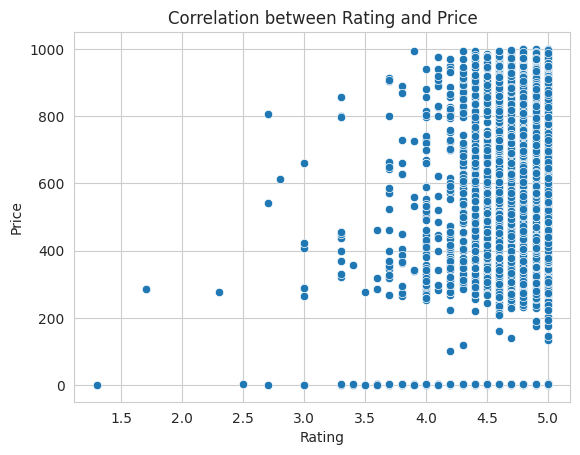

In [ ]:
# Assuming 'df' is your DataFrame

# Remove rows with rating = 0
df = df[df['rating'] != 0]

# Set the plot style
sns.set_style("whitegrid")

# Create the scatter plot
sns.scatterplot(data=df, x="rating", y="price")

# Set labels and title
plt.xlabel("Rating")
plt.ylabel("Price")
plt.title("Correlation between Rating and Price")

# Display the plot
plt.show()